## 라인 플롯으로 연속 변수의 추세 조사
- 시간 변수가 있을 경우 사용
- 구간 수가 적을 때에는 막대 그래프를 사용하기도 함
- 추세를 시각화하고, 갑작스러운 변화가 있는지 / 그룹에 따라 다르게 나타나는지 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

coviddaily=pd.read_csv('C:/data-cleansing-main/Chapter05/data/covidcases720.csv',parse_dates=['casedate'])

In [5]:
coviddaily.sample(2,random_state=1).T

,13482,2445
iso_code,IMN,BRB
continent,Europe,North America
location,Isle of Man,Barbados
casedate,2020-06-20 00:00:00,2020-04-28 00:00:00
total_cases,336.0,80.0
new_cases,0.0,1.0
total_deaths,24.0,6.0
new_deaths,0.0,0.0
total_cases_per_million,3951.454,278.386
new_cases_per_million,0.0,3.48


In [6]:
# 일일 신규 확진자 및 사망자 계산
coviddailytotals=coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].groupby(['casedate'])[['new_cases','new_deaths']].sum().reset_index()   # 특정 기간의 데이터를 신규 확진자와 사망자로 그룹핑한다.

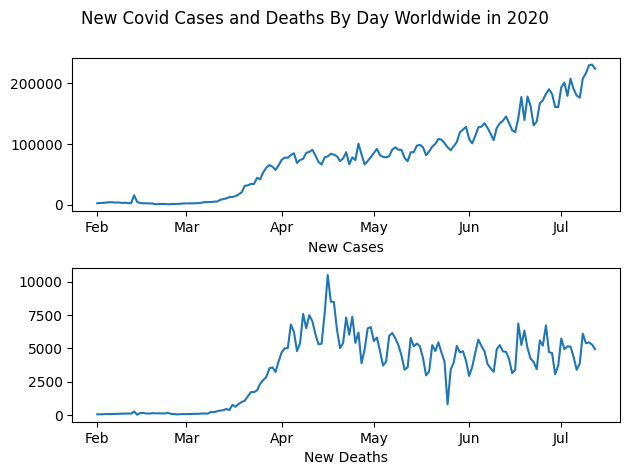

In [9]:
# 라인 플롯으로 그리기
fig=plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")
ax1=plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate,coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")

ax2=plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate,coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))                  # 월 단위로 나타내기
ax2.set_xlabel("New Deaths")                                        # 서브플롯을 그리고 있으므로 xlabel이 아닌 set_xlabel로 x축 레이블 지정

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [13]:
# 신규 확진자 및 사망자 수를 일자 및 지역별로 계산
regiontotals=coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].groupby(['casedate','region'])['new_cases','new_deaths'].sum().reset_index()
regiontotals

C:\Users\KYW\AppData\Local\Temp\ipykernel_7232\2234800061.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regiontotals=coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].groupby(['casedate','region'])['new_cases','new_deaths'].sum().reset_index()


,casedate,region,new_cases,new_deaths
0,2020-02-01,Caribbean,0.0,0.0
1,2020-02-01,Central Asia,0.0,0.0
2,2020-02-01,East Asia,2110.0,46.0
3,2020-02-01,Eastern Europe,2.0,0.0
4,2020-02-01,North Africa,0.0,0.0
...,...,...,...,...
2476,2020-07-12,South Asia,34534.0,674.0
2477,2020-07-12,Southern Africa,13857.0,118.0
2478,2020-07-12,West Africa,1922.0,19.0
2479,2020-07-12,West Asia,13378.0,349.0


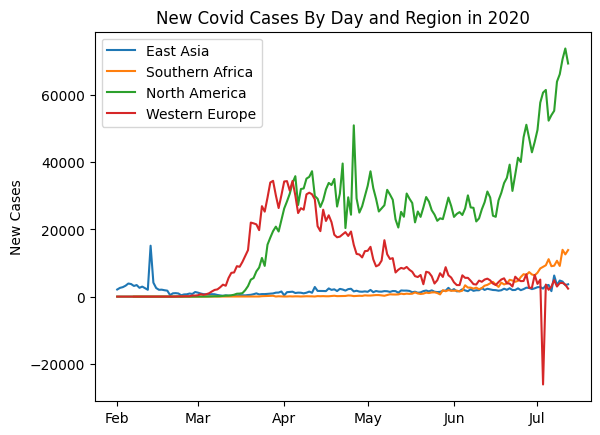

In [14]:
# 지역별 신규 확진자 수를 라인 플롯으로 나타내기
showregions = ['East Asia','Southern Africa','North America','Western Europe']

for j in range(len(showregions)):
    rt=regiontotals.loc[regiontotals.region==showregions[j],['casedate','new_cases']]           # 각 나라의 데이터로 데이터프레임을 만든 후
    plt.plot(rt.casedate,rt.new_cases,label=showregions[j])                                     # 데이터프레임의 컬럼에 접근하여 그래프 생성

plt.title("New Covid Cases By Day and Region in 2020")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

### 스택 플롯
- 상승세 조사?

In [18]:
af=regiontotals.loc[regiontotals.region=='Southern Africa',['casedate','new_cases']].rename(columns={'new_cases':'afcases'})        # 조건에 맞는 데이터 선택 후, 컬럼명 수정
sa=coviddaily.loc[coviddaily.location=='South Africa',['casedate','new_cases']].rename(columns={'new_cases':'sacases'})

af=pd.merge(af,sa,left_on=['casedate'],right_on=['casedate'],how='left')
af.sacases.fillna(0,inplace=True)

af['afcasesnosa']=af.afcases-af.sacases                                 # 아프리카 남부 확진자 수에서 남아공 확진자 수를 뺸 값 얻기

afabb=af.loc[af.casedate.between('2020-04-01','2020-07-12')]

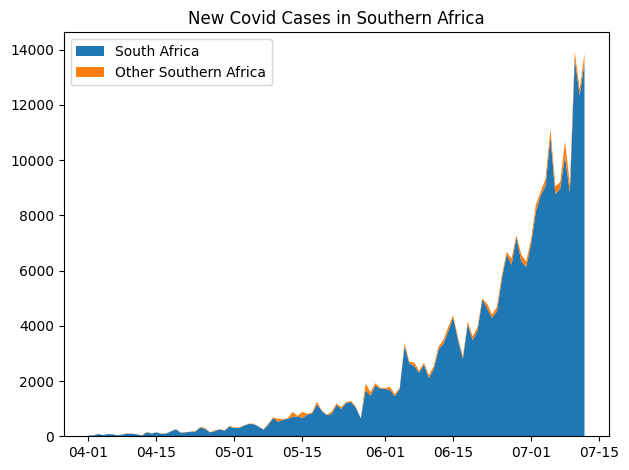

In [19]:
fig=plt.figure()
ax=plt.subplot()
ax.stackplot(afabb.casedate,afabb.sacases,afabb.afcasesnosa,labels=['South Africa','Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in Southern Africa")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

- 남아공의 확진자 수가 아프리카 남부 전체 확진자 수 증가를 주도함